# Exercise 16 – Candidate News Coverage and Facebook Followers during GE2020

### Introduction

Today, we will work with data collected during the recent 2020 general election (GE2020). The objective of this activity is to draw on the R coding skills you acquired over the last few weeks, and to further practice using linear models to predict data. Therefore,

try to work on this activity independently,
if you get stuck, then feel free to ask for help of work with others
This activity includes more questions than you are expected to be able to answer during class. The rest of the questions can be used for extra practice at home. A .html document with solutions to all questions will be available at the end of the day so you will be able to check your answers.

Now, let’s start. Download fb_followers.csv from Canvas. After setting the correct working directory, import this dataset in R using the command read.csv().

In [16]:
fbf <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 13 - Election Coverages/fb_followers.csv")

Inspect the file and you will find that it contains five variables:

- candidate: The names of the 93 PAP candidates nominated by the People’s Action Party in GE2020
- fb_followers: A numeric variable that records the number of Facebook followers of their official Facebook page at midnight the night before polling day (00:00 July 10, 2020)
- articles: A numeric variable that records the number of articles published by local newspapers between nomination day and polling day that mentioned the candidate by name
- incumbent: A logical variable that indicates whether the candidate was an incumbent MP (i.e. they had served as an MP in the previous Parliament) or a first-time candidate
- officeholder: A logical verctor that indicates whether the candidate was an officeholder (e.g. Cabinet Minister, Minister of State) in the previous Parliament

In [17]:
head(fbf)

candidate,fb_followers,articles,incumbent,officeholder
Alex Yam,3979,4,TRUE,FALSE
Alex Yeo,1234,8,FALSE,FALSE
Alvin Tan,3579,7,FALSE,FALSE
Amrin Amin,48340,13,TRUE,TRUE
Amy Khor,31959,3,TRUE,TRUE
Ang Wei Neng,9227,15,TRUE,FALSE


In [18]:
unique(fbf$candidate)

[1] Alex Yam                Alex Yeo                Alvin Tan              
 [4] Amrin Amin              Amy Khor                Ang Wei Neng           
 [7] Muhamad Faishal Ibrahim Baey Yam Keng           Carrie Tan             
[10] Chan Chun Sing          Chan Hui Yuh            Chee Hong Tat          
[13] Cheng Li Hui            Cheryl Chan             Chong Kee Hiong        
[16] Christopher de Souza    Chua Eng Leong          Darryl David           
[19] Denise Phua Lay Peng    Derrick Goh             Desmond Choo           
[22] Desmond Lee             Desmond Tan             Don Wee                
[25] Lim Wee Kiak            Maliki Osman            Edward Chia Bing Hui   
[28] Edwin Tong              Eric Chua               Fahmi Aliman           
[31] Foo Mee Har             Gan Kim Yong            Gan Siow Huang         
[34] Gan Thiam Poh           Grace Fu                Hany Soh               
[37] Heng Chee How           Heng Swee Keat          Indranee Rajah         
[40] Janil Puthucheary       Jessica Tan Soon Neo    Joan Pereira           
[43] Josephine Teo           K Shanmugam             Koh Poh Koon           
[46] Kwek Hian Chuan         Lam Pin Min             Lawrence Wong          
[49] Lee Hong Chuang         Lee Hsien Loong         Liang Eng Hwa          
[52] Lim Biow Chuan          Louis Ng Kok Kwang      Low Yen Ling           
[55] Mariam Jaafar           Masagos Zukifli         Melvin Yong            
[58] Murali Pillai           Nadia A. Samdin         Ng Chee Meng           
[61] Ng Eng Hen              Ng Ling Ling            Ong Ye Kung            
[64] Patrick Tay             Poh Li San              Rachel Ong Sin Yen     
[67] Rahayu Mahzam           Raymond Lye             S Iswaran              
[70] Saktiandi Supaat        Seah Kian Peng          Shamsul Kamar          
[73] Sharael Taha            Shawn Huang Wei Zhong   Sim Ann                
[76] Sitoh Yi Pin            Sun Xueling             Tan Chuan-Jin          
[79] Tan Kiat How            Tan See Leng            Tan Wu Meng            
[82] Teo Chee Hean           Tharman Shanmugaratnam  Tin Pei Ling           
[85] Victor Lye Thiam Fatt   Vikram Nair             Vivian Balakrishnan    
[88] Wan Rizal               Xie Yao Quan            Yeo Wan Ling           
[91] Yip Hon Weng            Zaqy Mohamad            Zhul Rahim             
93 Levels: Alex Yam Alex Yeo Alvin Tan Amrin Amin Amy Khor ... Zhul Rahim

In [19]:
str(fbf)

'data.frame':	93 obs. of  5 variables:
 $ candidate   : Factor w/ 93 levels "Alex Yam","Alex Yeo",..: 1 2 3 4 5 6 57 7 8 9 ...
 $ fb_followers: int  3979 1234 3579 48340 31959 9227 22023 39247 2253 83875 ...
 $ articles    : int  4 8 7 13 3 15 6 4 7 39 ...
 $ incumbent   : logi  TRUE FALSE FALSE TRUE TRUE TRUE ...
 $ officeholder: logi  FALSE FALSE FALSE TRUE TRUE FALSE ...


## Challenge: Use fb_followers data to examine the relationship between news coverage of PAP candidates during the campaign and the number of Facebook followers they accumulate

Is there an relationship between news coverage of candidates during electoral campaigns and the number of followers they collect on social media platforms such as Facebook? If all press is good press and success in politics is at least partly contingent on name recognition (you cannot vote for who you don’t know), then the relationship between news coverage of candidates and their online followings seems worthy of investigation.

This exercise involves examining the relationship between local newspaper coverage of candidates running for the People’s Action Party (PAP) during Singapore’s recent GE2020 and the number of Facebook followers that the candidate had accumulated on their official Facebook page as of midnight the night before polling day on July 10, 2020. In particular, let’s see if we can use the amount of news coverage received by candidates (articles) to predict their Facebook followings (fb_followers).

## Q1: Does the relationship meet the conditions for linear regression?

Before we attempt to run any linear regressions, let’s first visualise the data and check to see whether our variables meet the conditions for regression. To recall, these are:

- The variables are quantitative (already know this)
- No outliers
- The relationship is straight enough

### Step 1: Make a scatter plot of fb_followers by articles

Do you see any outliers? Does the relationship seem straight enough?

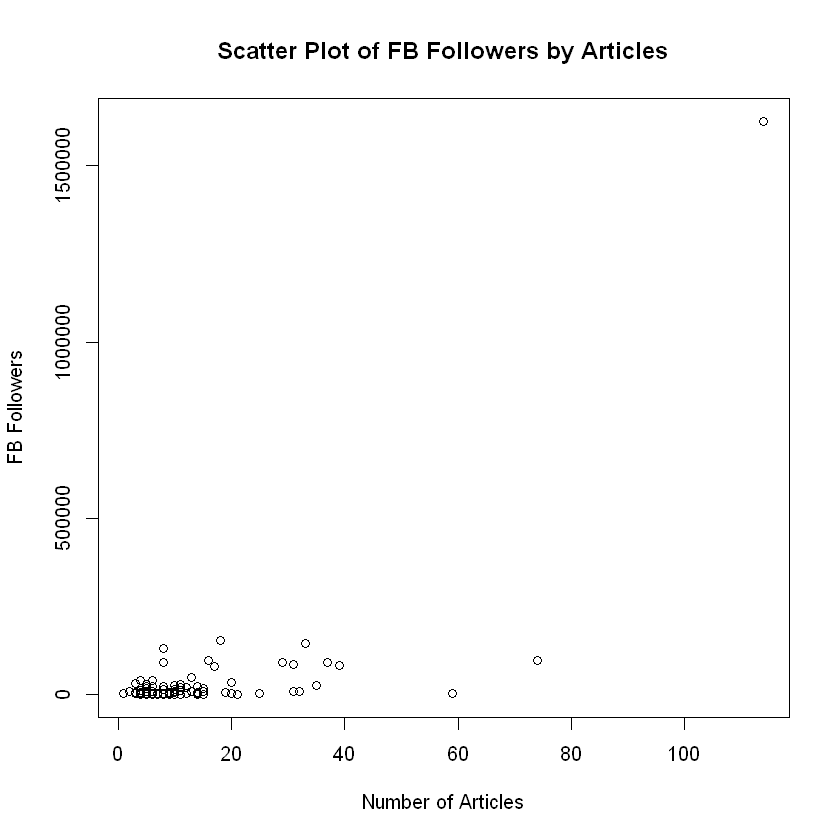

In [21]:
plot(fb_followers ~ articles,
     data = fbf,
    main = "Scatter Plot of FB Followers by Articles",
    xlab = "Number of Articles",
    ylab = "FB Followers")

# THERE IS ONE MAJOR OUTLIER ON THE VERY END OF IT

### Step 2: Make Histograms of fb_followers and articles

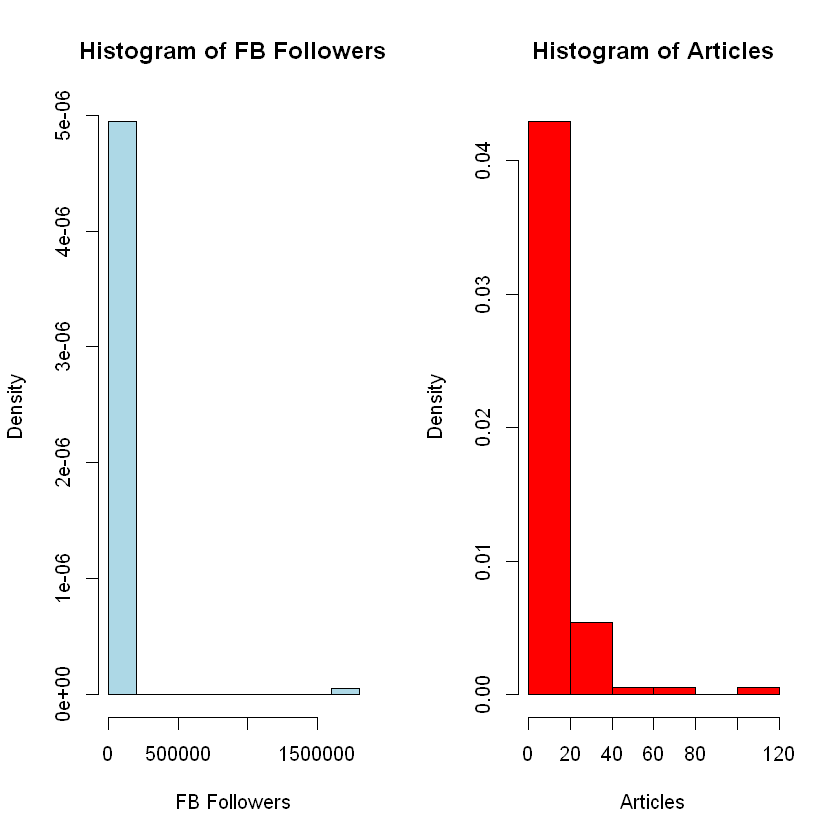

In [26]:
par(mfrow = c(1,2))

hist(fbf$fb_followers,
    col = "lightblue",
    main = "Histogram of FB Followers",
    xlab = "FB Followers",
    freq = FALSE)

hist(fbf$articles,
    col = "red",
    main = "Histogram of Articles",
    xlab = "Articles",
    freq = FALSE)

### Step 3: Make Boxplots of fb_followers and articles

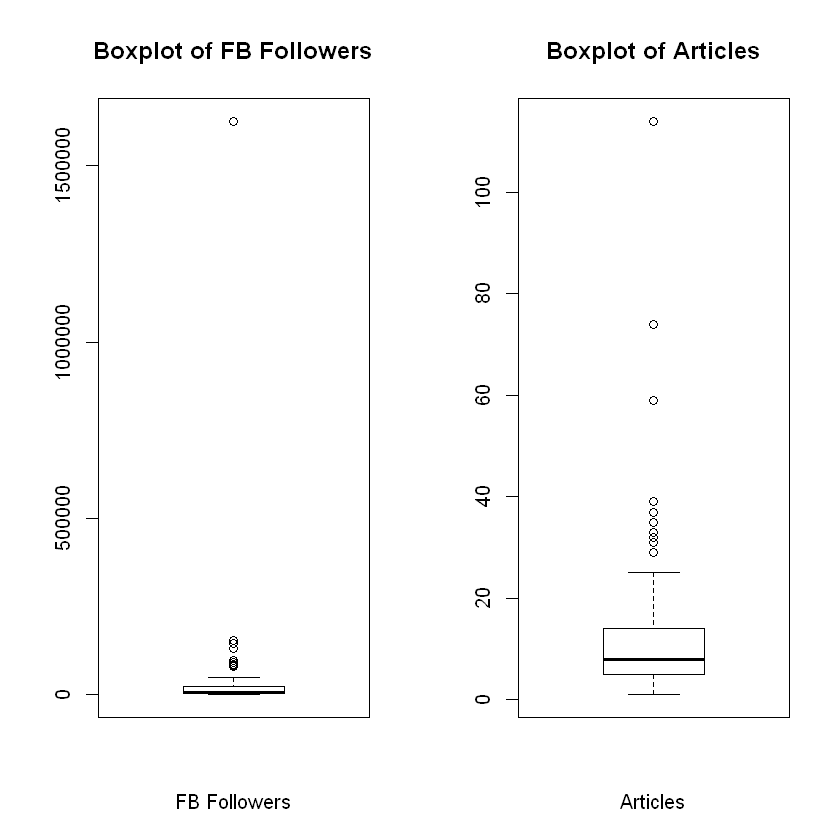

In [30]:
par(mfrow = c(1,2))

boxplot(fbf$fb_followers,
       data = fbf,
       main = "Boxplot of FB Followers",
       xlab = "FB Followers")

boxplot(fbf$articles,
        main = "Boxplot of Articles",
        xlab = "Articles")

The results from Steps 1-3 would seem to indicate that we may have issues with outliers. Before going any further, we should probably transform both of our variables and reassess the relationship of the transformed variables.

### Step 4: Transform variables using decadal log

In [32]:
fbf$log_fb_followers <- log(fbf$fb_followers, 10)

fbf$log_articles <- log(fbf$articles, 10)

### Step 5: Reassess the relationship of logged variables using scatter plot

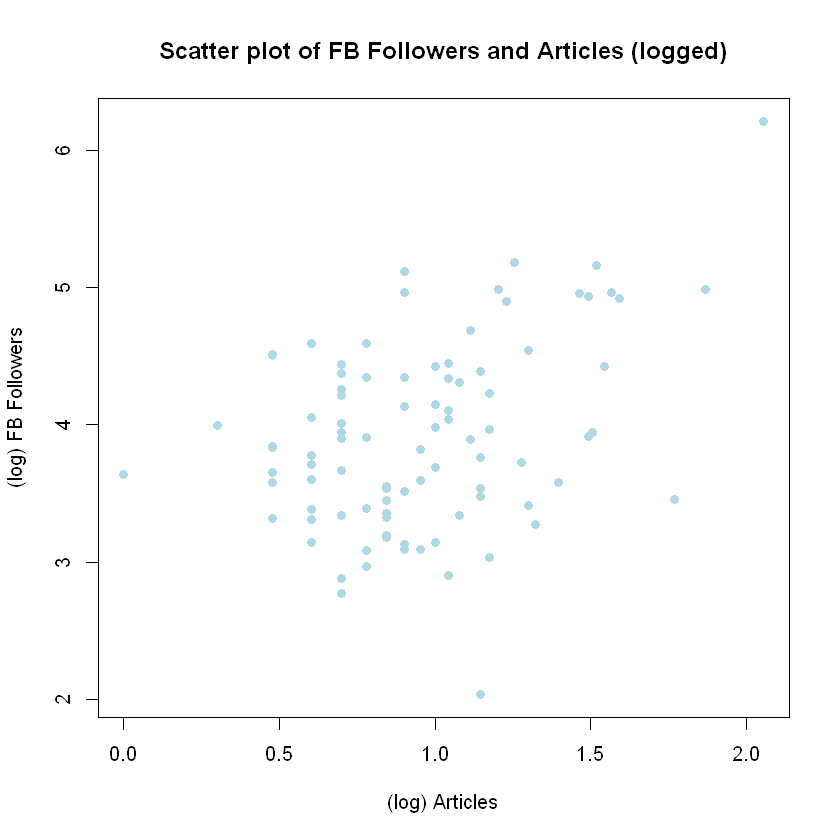

In [34]:
plot(log_fb_followers ~ log_articles,
    data = fbf,
    main = 'Scatter plot of FB Followers and Articles (logged)',
    xlab = "(log) Articles",
    ylab = "(log) FB Followers",
    col = "lightblue",
    pch = 19)

### Step 6: Make Histograms of logged variables

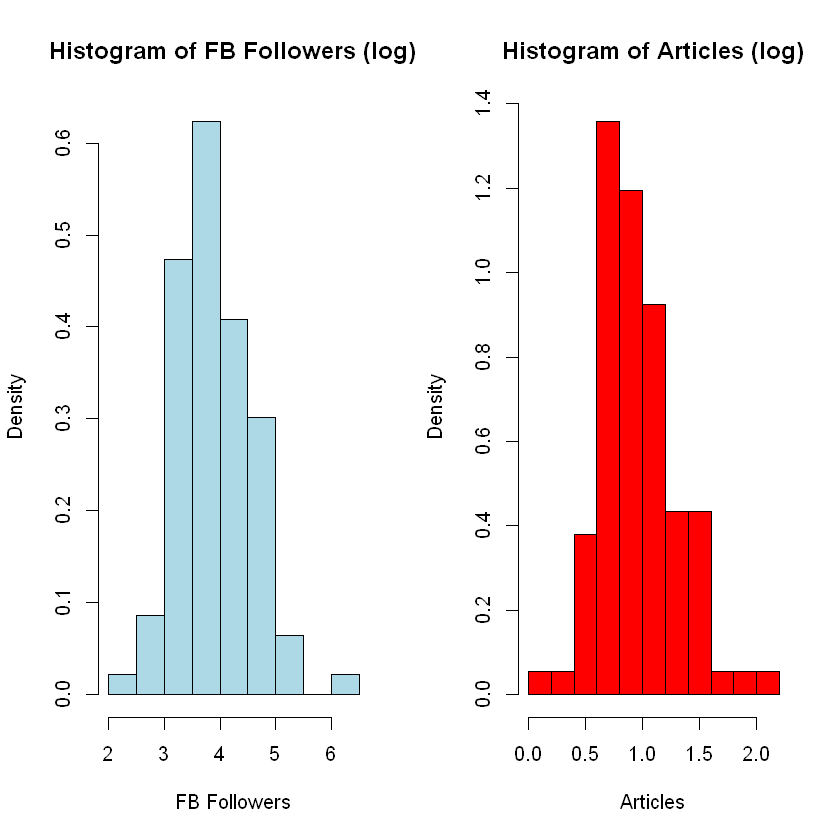

In [38]:
par(mfrow = c(1,2))

hist(fbf$log_fb_followers,
    col = "lightblue",
    main = "Histogram of FB Followers (log)",
    xlab = "FB Followers",
    freq = FALSE)

hist(fbf$log_articles,
    col = "red",
    main = "Histogram of Articles (log)",
    xlab = "Articles",
    freq = FALSE)

### Step 7: Make boxplots of logged variables

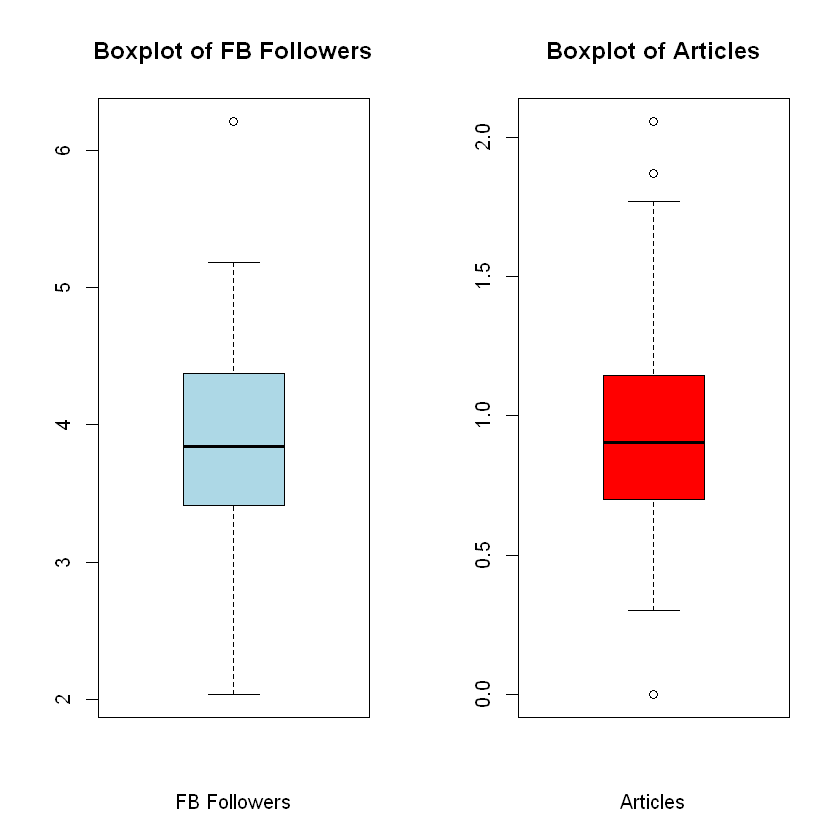

In [48]:
par(mfrow = c(1,2))

boxplot(fbf$log_fb_followers,
       data = fbf,
       main = "Boxplot of FB Followers",
       xlab = "FB Followers",
       col = "lightblue")

boxplot(fbf$log_articles,
        main = "Boxplot of Articles",
        xlab = "Articles",
        col = "red")

Okay, so taking the decadal log of both fb_followers and articles seems to produce a scatter plot that is straight enough. While the scatter plot as well as the histograms and boxplots still seems indicate the presence of some outliers, they do not seem to be nearly as problematic as before. The resulting distributions also look somewhat normal.

Let’s now proceed to estimating a linear model.

## Q2: Can you predict FB Followers using News Coverage?

So lets see whether the news coverage a candidate receives during the campaign period predicts the number of Facebook followers that they have accumulated by the end of the campaign period by running a linear model on the log transformed variables.

### Step 8: Estimate the Linear Model

In [41]:
lm_fb_followers <- lm(log_fb_followers ~ log_articles, data = fbf)
lm_fb_followers


Call:
lm(formula = log_fb_followers ~ log_articles, data = fbf)

Coefficients:
 (Intercept)  log_articles  
      3.2237        0.7241  


### Step 9: Interpret the Coefficients

What is the intercept? What is the slope? How would you interpret it in everyday language?

In [ ]:
# THE INTERCEPT IS 3.2237

# THE SLOPE IS 0.7241

# THIS MEANS THAT FOR EVERY INCREASE IN ARTICLE, THERE IS A CORRESPONDING INCREASE IN FB FOLLOWERS

### Step 10: Create scatter plot with line of best fit

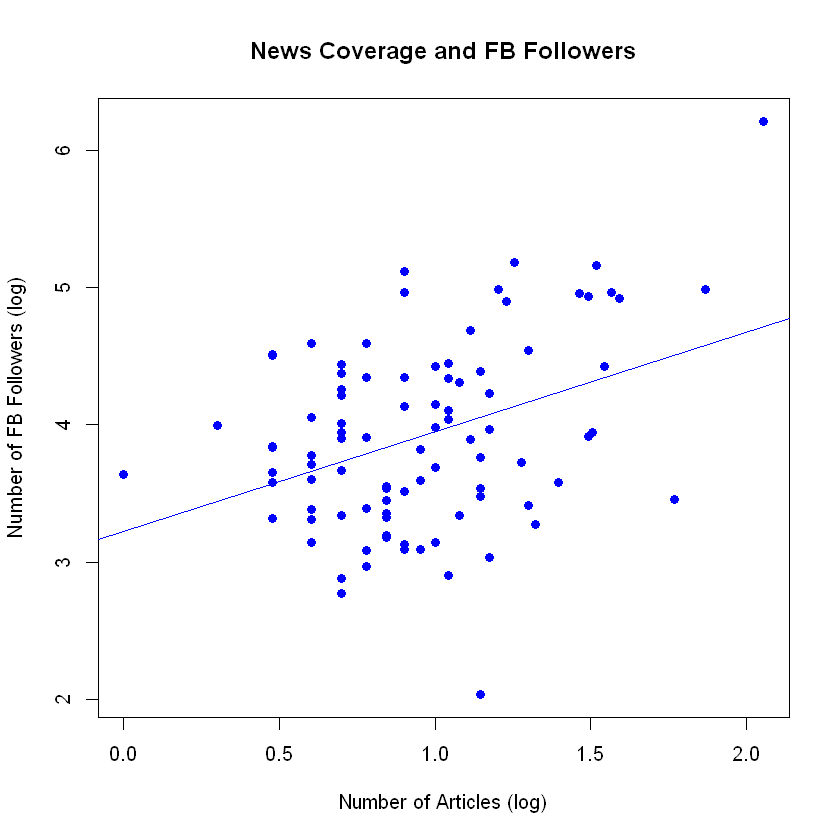

In [49]:
plot(log_fb_followers ~ log_articles,
    data = fbf,
    xlab = "Number of Articles (log)",
    ylab = "Number of FB Followers (log)",
    main = "News Coverage and FB Followers",
    col = "blue",
    pch = 19)

abline(lm_fb_followers, col = "blue")

## Q3: Is the Relationship the Same for First-Time Candidates and Incumbents?

Is the relationship between news coverage and FB followers the same for first-time candidates and incumbents? Do incumbents seem to have an advantage in the race for followers and name recognition?

Every general election, the PAP retires approximately one-fourth to one third of incumbent PAP Members of Parliament (MPs) as part of the PAP’s self-renewal process and replaces them with first-time candidates. These first-time candidates represent the future of the party but (in most cases) are not yet known to the electorate and presumably do not yet enjoy widespread name recognition. By contrast, incumbent PAP MPs presumably enjoy greater name recognition at least within their own constituencies given a record of constituency service built up prior to the election.

One way that we might find out whether incumbents have an advantage in their number of followers, or if news coverage during the campaign is associated with greater increases in the number of followers for first-time candidates (as opposed to incumbents) is by subsetting the data, and comparing the intercepts and slopes.

### Step 11: Subset the data by incumbent

In [52]:
head(fbf)

firsttimers <- fbf[fbf$incumbent == "FALSE", ] 

incumbents <- fbf[fbf$incumbent == "TRUE", ]

candidate,fb_followers,articles,incumbent,officeholder,log_fb_followers,log_articles
Alex Yam,3979,4,TRUE,FALSE,3.599774,0.6020600
Alex Yeo,1234,8,FALSE,FALSE,3.091315,0.9030900
Alvin Tan,3579,7,FALSE,FALSE,3.553762,0.8450980
Amrin Amin,48340,13,TRUE,TRUE,4.684307,1.1139434
Amy Khor,31959,3,TRUE,TRUE,4.504593,0.4771213
Ang Wei Neng,9227,15,TRUE,FALSE,3.965061,1.1760913


### Step 12: Estimate linear models on the subsets

Lets estimate some linear models, inspect the output, and compare the slopes and intercepts:

In [54]:
lm_firsttimers <- lm(log_fb_followers ~ log_articles, data = firsttimers)

lm_incumbents <- lm(log_fb_followers ~ log_articles, data = incumbents)

lm_firsttimers
lm_incumbents


Call:
lm(formula = log_fb_followers ~ log_articles, data = firsttimers)

Coefficients:
 (Intercept)  log_articles  
     3.18075       0.03106  



Call:
lm(formula = log_fb_followers ~ log_articles, data = incumbents)

Coefficients:
 (Intercept)  log_articles  
      3.5862        0.6343  


### Step 13: Plot scatter plots and lines of best fit for both subsets in one plot

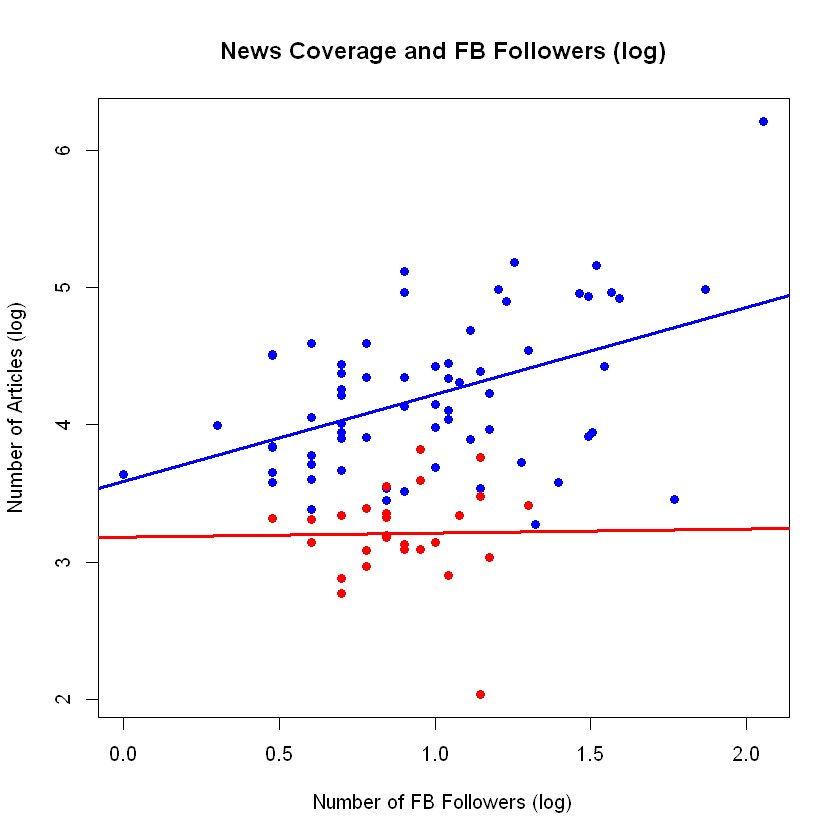

In [64]:
plot(log_fb_followers ~ log_articles,
    data = incumbents,
    col = "blue",
    xlab = "Number of FB Followers (log)",
    ylab = "Number of Articles (log)",
    main = "News Coverage and FB Followers (log)",
    pch = 19,
    xlim = range(fbf$log_articles, na.rm = TRUE),
    ylim = range(fbf$log_fb_followers, na.rm = TRUE))

points(log_fb_followers ~ log_articles,
    data = firsttimers,
    col = "red",
    pch = 19)

abline(lm_firsttimers, col = "red", lwd = 3)
abline(lm_incumbents, col = "blue", lwd = 3)

## Q4: Is the Relationship different for Incumbent Backbenchers vs. Officeholders

We can further divide the incumbent candidates into two types: Backbenchers and officeholders.

Backbenchers are incumbent MPs who, prior to the election, held no office within government and were just regular MPs. Officeholders are those who, prior to the dissolution of Parliament, held positions within government. Even though the campaign is held in between Parliaments, these incumbents tend to appear a lot at campagin events, on television, and give longer speeches than other incumbents.

### Step 14: Subset incumbents by officeholder status

In [67]:
backbenchers <- incumbents[incumbents$officeholder == FALSE, ]

officeholders <- incumbents[incumbents$officeholder == TRUE, ]

### Step 15: Estimate linear models on incumbent backbenchers, and incumbent officeholders

In [68]:
lm_officeholders <- lm(officeholders$log_fb_followers ~ officeholders$log_articles, data = officeholders)  

lm_backbenchers <- lm(backbenchers$log_fb_followers ~ backbenchers$log_articles, data = backbenchers)

### Step 16: Plot scatterplots with lines of best fit for all three subsets in a single plot

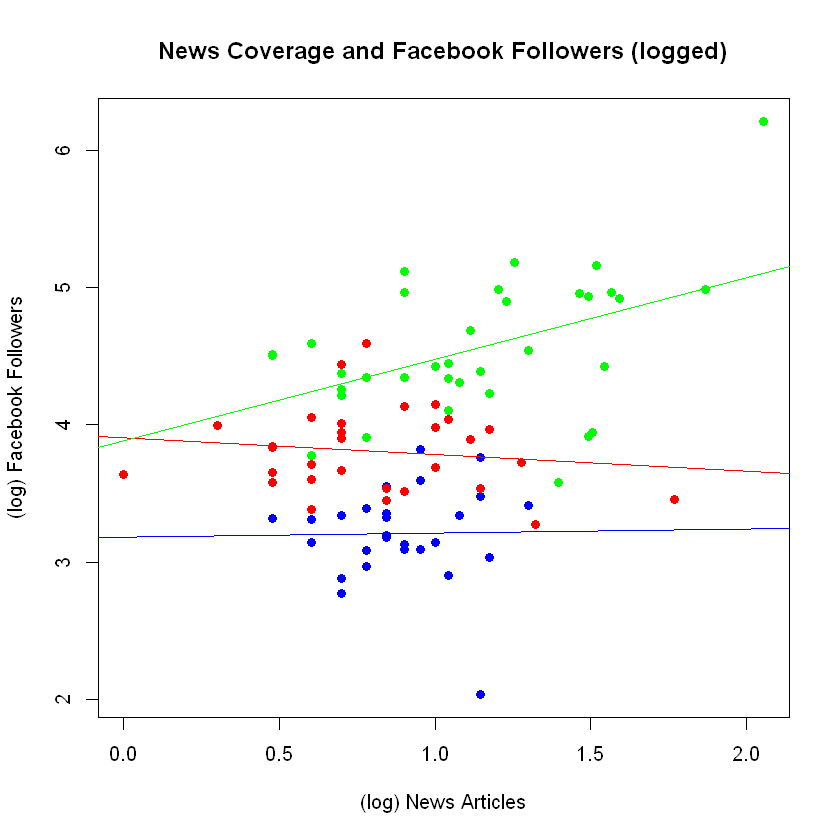

In [70]:
plot(log_fb_followers ~ log_articles,
    data = firsttimers,
    col = "blue",
    pch = 19,
    main = "News Coverage and Facebook Followers (logged)",
    xlab = "(log) News Articles",
    ylab = "(log) Facebook Followers",
    xlim = range(fbf$log_articles, na.rm=TRUE), 
    ylim = range(fbf$log_fb_followers, na.rm=TRUE))

points(log_fb_followers ~ log_articles, 
      data = backbenchers,
      col = "red",
      pch = 19)

points(log_fb_followers ~ log_articles, 
      data = officeholders,
      col = "green",
      pch = 19)

abline(lm_firsttimers, col = "blue")
abline(lm_backbenchers, col = "red")
abline(lm_officeholders, col = "green")

## Conclusion

So, what did we find? It would seem that there is ultimately little evidence of an association between candidate news coverage and Facebook followers for first-time candidates and incumbent backbenchers. In contrast, there appears to be some evidence of an association between news coverage and Facebook followers for incumbent officeholders.

What might explain this? Well, let’s first think back to the lesson in the previous class regarding how correlation does not imply causation. As you likely remember, there are a number of things other than “A causes B” that can explain a correlation. For example perhaps the news coverage as well as the number of Facebook followers for incumbent officeholders are both driven by a third, “lurking variable”. Indeed, the act of subsetting incumbent PAPs would seem to suggest that the percieved power or status of the MP within the party or government (such that they are appointed to government office) may drive not only Facebook followers but also candidate news coverage during the campaign period.

As an additional task, you might check to see which PAP candidate had the most news coverage during the campagin and the most Facebook followers. Do you think that this candidate got those Facebook followers because of the attention they received from the press during the campaign period? Or did they get those followers and the news coverage because they are, well, important?